In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.tsa as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
from tqdm import tqdm_notebook

In [2]:
df = pd.read_csv("COMBINED_RAJASTHAN1_2000-14.csv")

In [3]:
df

,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,3.976945
1,2000,1,1,1,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,4.017371
2,2000,1,1,2,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,3.992325
3,2000,1,1,3,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,3.981812
4,2000,1,1,4,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,3.985008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,5.375054
131396,2014,12,31,20,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,5.473386
131397,2014,12,31,21,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,5.500148
131398,2014,12,31,22,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,5.481440


In [4]:
df['Year']

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
131395    2014
131396    2014
131397    2014
131398    2014
131399    2014
Name: Year, Length: 131400, dtype: int64

In [5]:
df.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
DHI                     int64
DNI                     int64
GHI                     int64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Dew Point               int64
Temperature           float64
Pressure              float64
Relative Humidity     float64
Solar Zenith Angle    float64
Wind Speed            float64
dtype: object

In [6]:
df=df.assign(datetime_val=[f"{str(year)}{str(month)}{str(day)}" for year, month, day in zip(df['Year'], df['Month'], df['Day'])])
df

,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,datetime_val
0,2000,1,1,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,3.976945,200011
1,2000,1,1,1,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,4.017371,200011
2,2000,1,1,2,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,3.992325,200011
3,2000,1,1,3,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,3.981812,200011
4,2000,1,1,4,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,3.985008,200011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,5.375054,20141231
131396,2014,12,31,20,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,5.473386,20141231
131397,2014,12,31,21,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,5.500148,20141231
131398,2014,12,31,22,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,5.481440,20141231


In [7]:
first_column = df.pop('datetime_val')
  
df.insert(0, 'datetime_val', first_column)

In [8]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], format='%Y%m%d')
df_time = df.set_index('datetime_val')
df

,datetime_val,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000-01-01,2000,1,1,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,3.976945
1,2000-01-01,2000,1,1,1,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,4.017371
2,2000-01-01,2000,1,1,2,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,3.992325
3,2000-01-01,2000,1,1,3,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,3.981812
4,2000-01-01,2000,1,1,4,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,3.985008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014-12-31,2014,12,31,19,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,5.375054
131396,2014-12-31,2014,12,31,20,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,5.473386
131397,2014-12-31,2014,12,31,21,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,5.500148
131398,2014-12-31,2014,12,31,22,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,5.481440


In [9]:
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot') 

c:\users\91993\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed', ylabel='Density'>

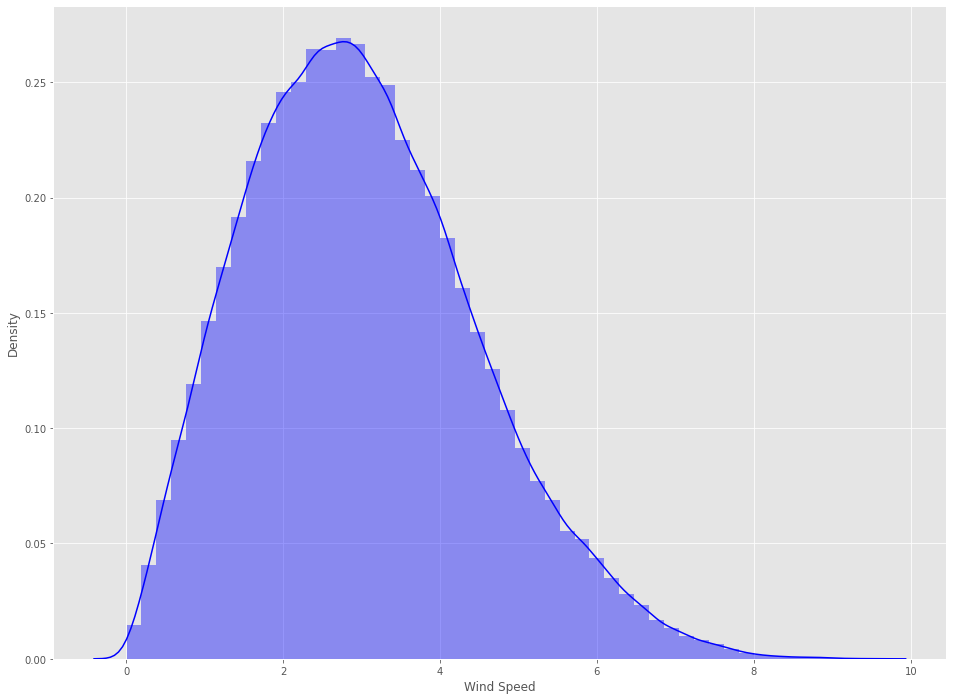

In [10]:
sns.distplot(df['Wind Speed'], color='b')

In [11]:
df_day = df_time.resample('D').agg({'Wind Speed':'max'})
df_day = df_day.replace({'Wind Speed':{0:np.median(df_day['Wind Speed'])}})

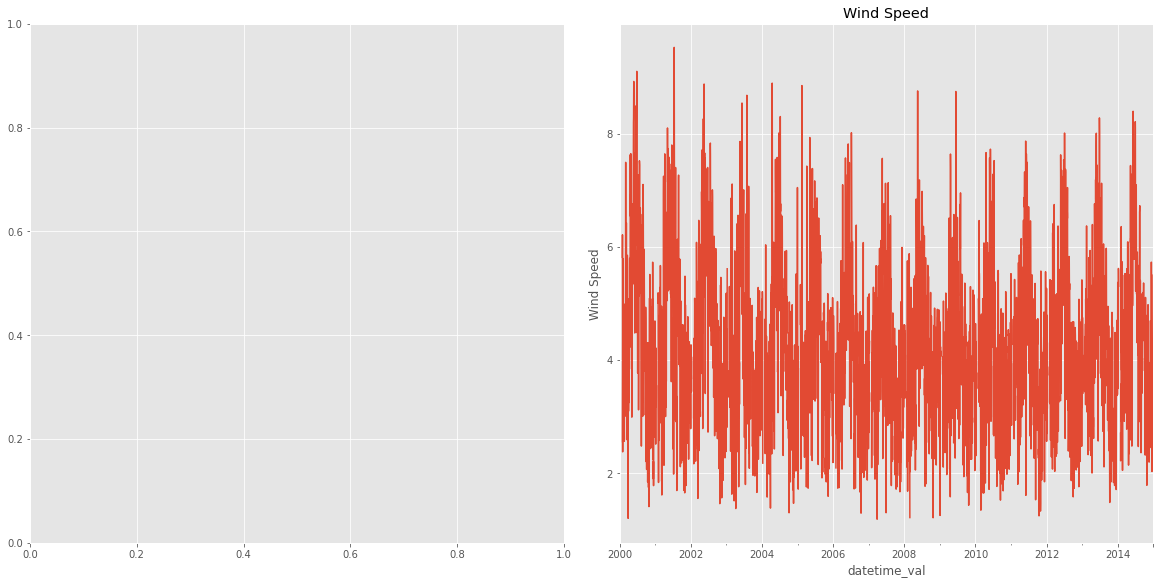

In [12]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8), constrained_layout=True)

df_day['Wind Speed'].plot(ax=ax2);
ax2.set_ylabel('Wind Speed');
ax2.set_title('Wind Speed');

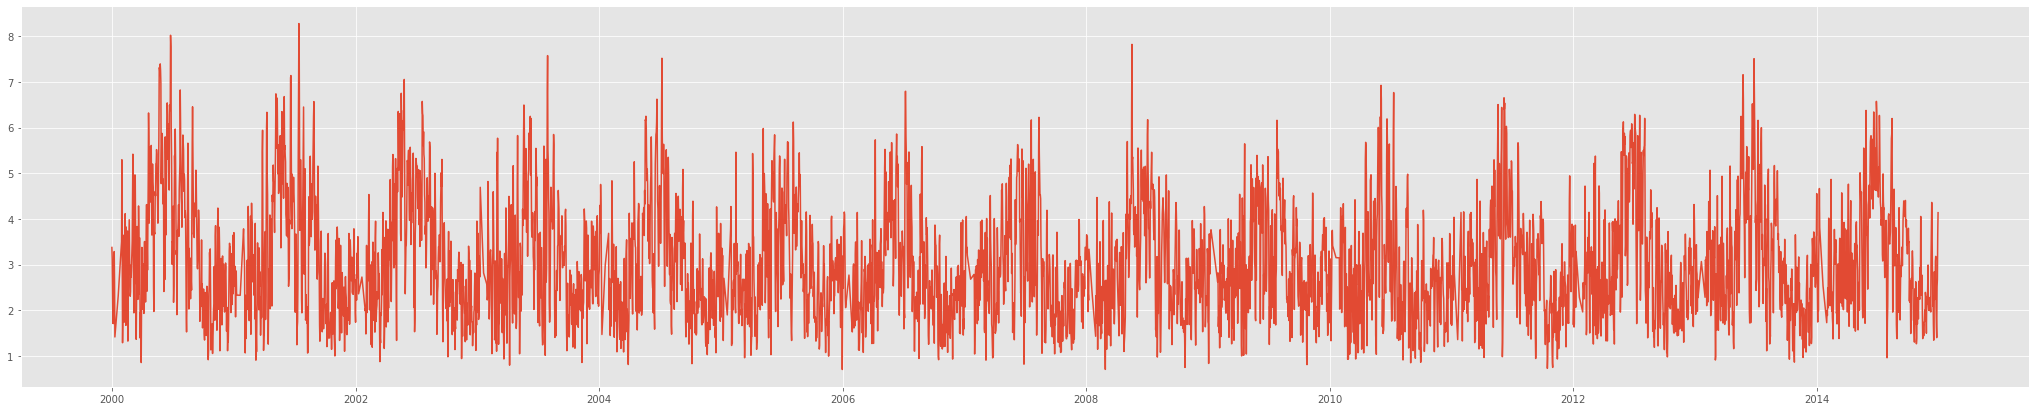

In [13]:
data = [df['datetime_val'],df['Wind Speed']]
headers = ["date_time","Wind Speed"]
temp_df = pd.concat(data,axis=1,keys=headers)
daily_RJ = temp_df.groupby(temp_df['date_time'].dt.date).agg({'Wind Speed': 'mean'}).reset_index()
# print(temp_df)
# monthly_AP = temp_df.groupby(temp_df['date_time'].dt.month).agg({'GHI':'sum'}).reset_index()
daily_RJ.set_index('date_time')

plt.rcParams["figure.figsize"] = (36,7)

plt.plot(daily_RJ['date_time'],daily_RJ['Wind Speed'])

In [14]:
daily_RJ

,date_time,Wind Speed
0,2000-01-01,3.374157
1,2000-01-02,3.120238
2,2000-01-03,2.474218
3,2000-01-04,1.710244
4,2000-01-05,1.780105
...,...,...
5200,2014-12-27,1.398881
5201,2014-12-28,2.510863
5202,2014-12-29,2.678796
5203,2014-12-30,3.658310


c:\users\91993\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


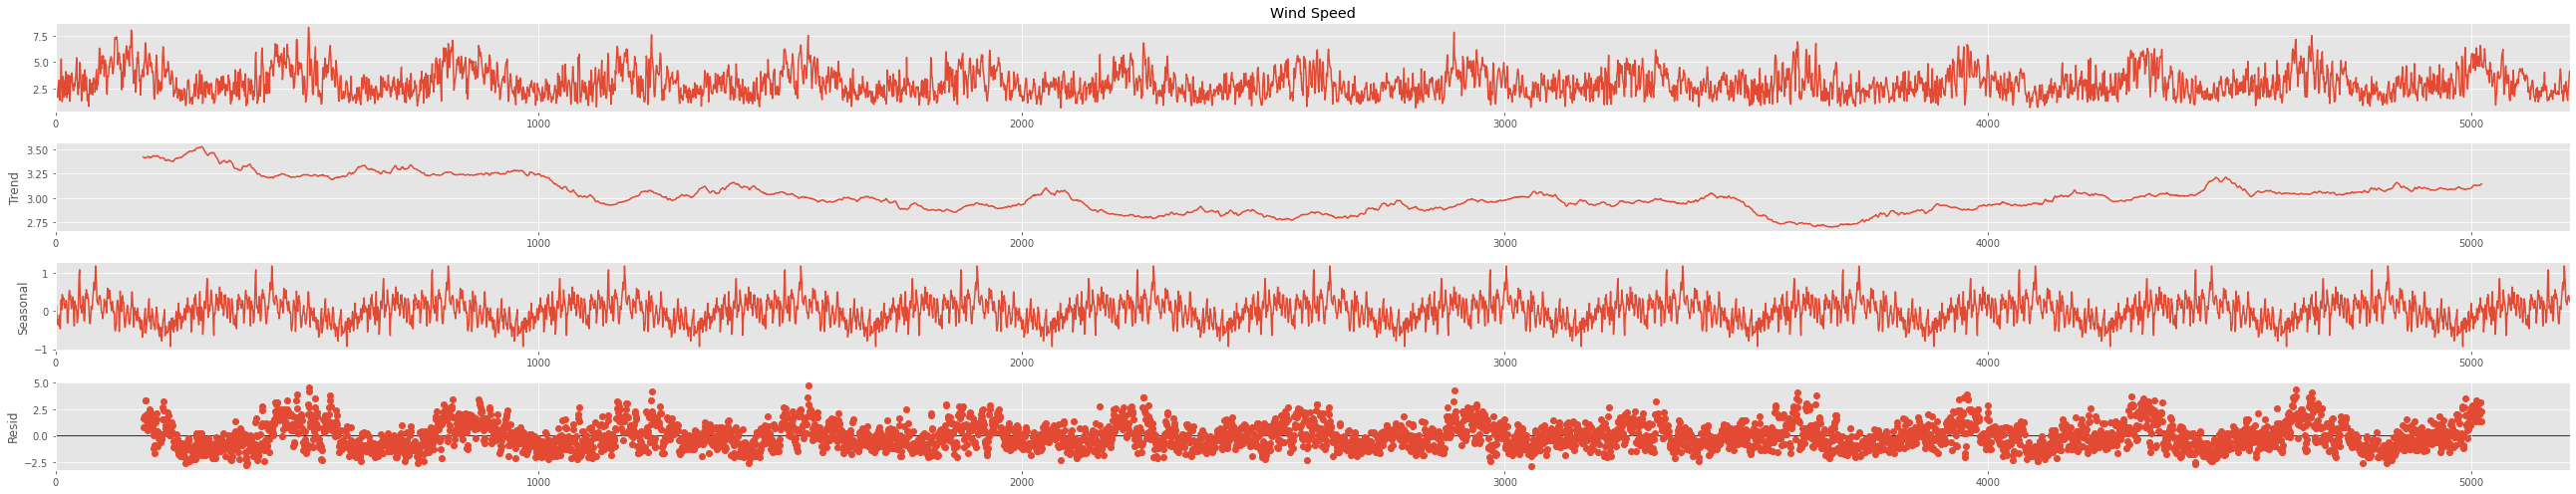

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(daily_RJ['Wind Speed'], model='additive',freq=365)
result.plot()
plt.show()

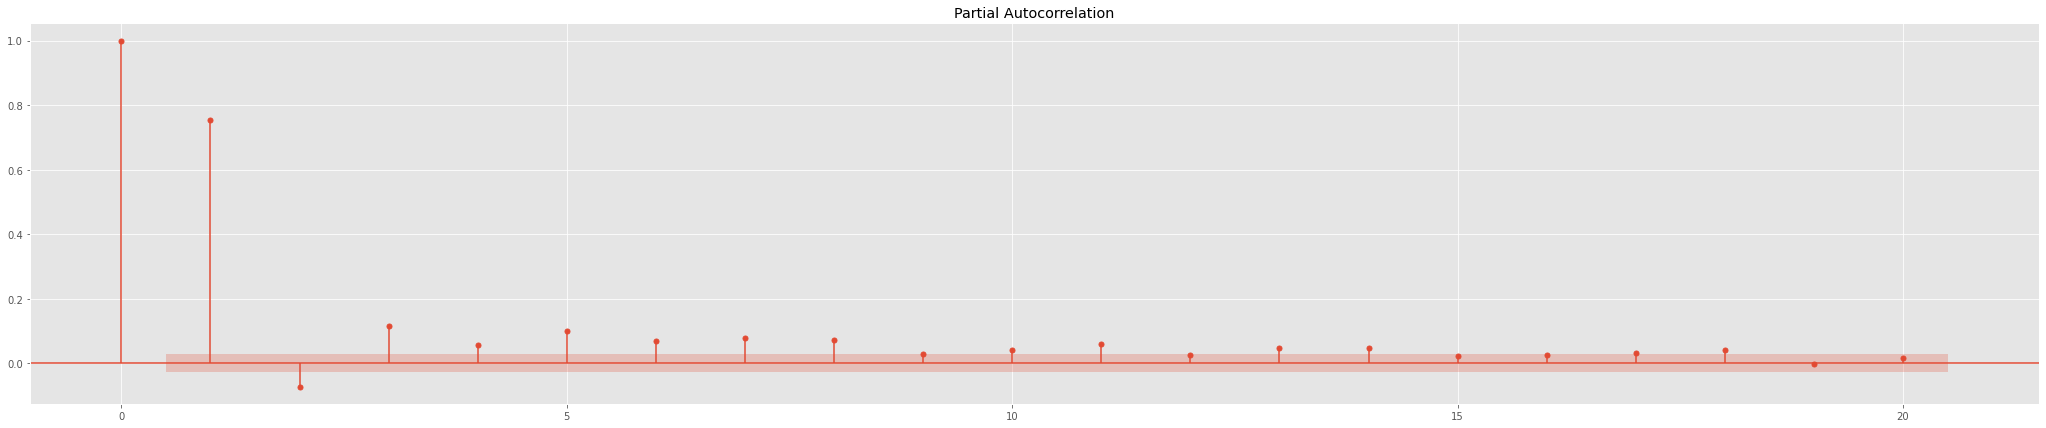

In [16]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(daily_RJ['Wind Speed'],lags = 20)

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
ar_model = ARIMA(daily_RJ['Wind Speed'],order=(12,0,0))
ar_fit_model = ar_model.fit()
print(ar_fit_model.summary())
residuals = pd.DataFrame(ar_fit_model.resid)

                               SARIMAX Results                                
Dep. Variable:             Wind Speed   No. Observations:                 5205
Model:                ARIMA(12, 0, 0)   Log Likelihood               -6224.731
Date:                Sun, 25 Apr 2021   AIC                          12477.462
Time:                        12:34:19   BIC                          12569.265
Sample:                             0   HQIC                         12509.572
                               - 5205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0383      0.084     36.134      0.000       2.874       3.203
ar.L1          0.7784      0.013     61.928      0.000       0.754       0.803
ar.L2         -0.1671      0.016    -10.483      0.0

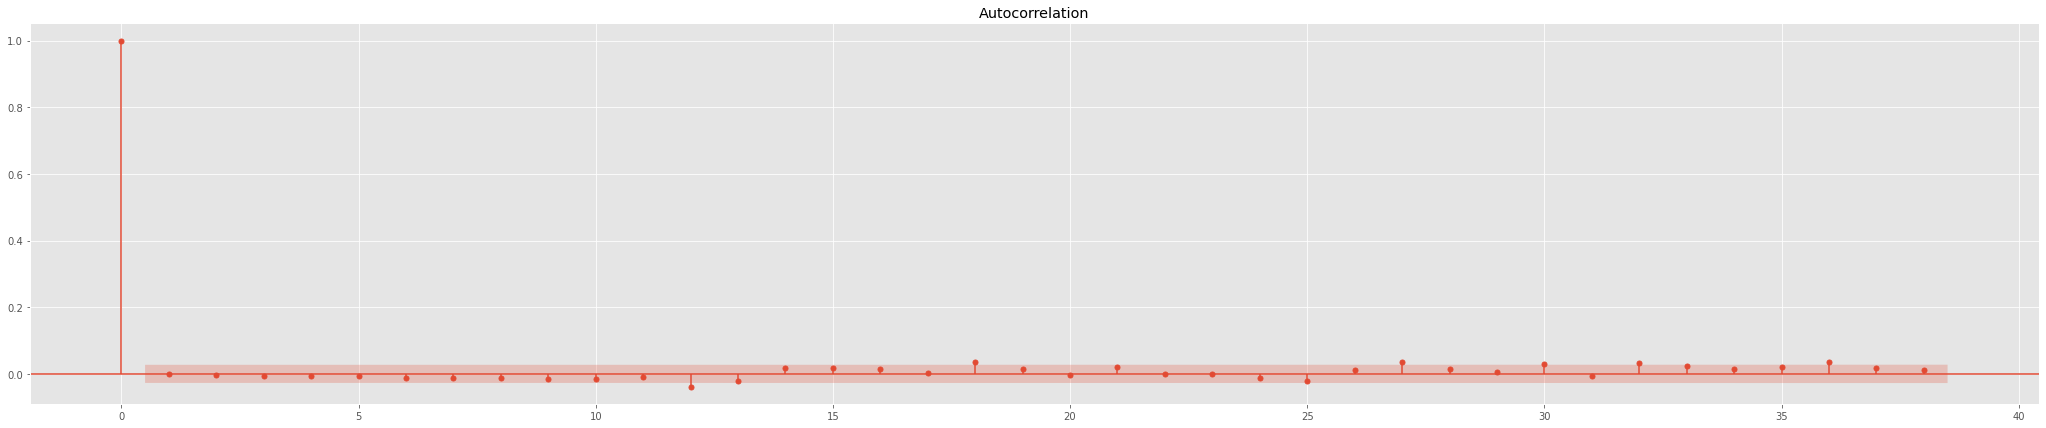

In [19]:
acf_plot = plot_acf(residuals)

In [20]:
# Finding Forecast Error
percentage = []
for i in range(len(residuals)):
  if (daily_RJ['Wind Speed'][i]==0):
    continue
  percentage.append((abs(residuals[0][i])/(daily_RJ['Wind Speed'][i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

Mean Absolute Percentage Error: 24.794566918348977 %


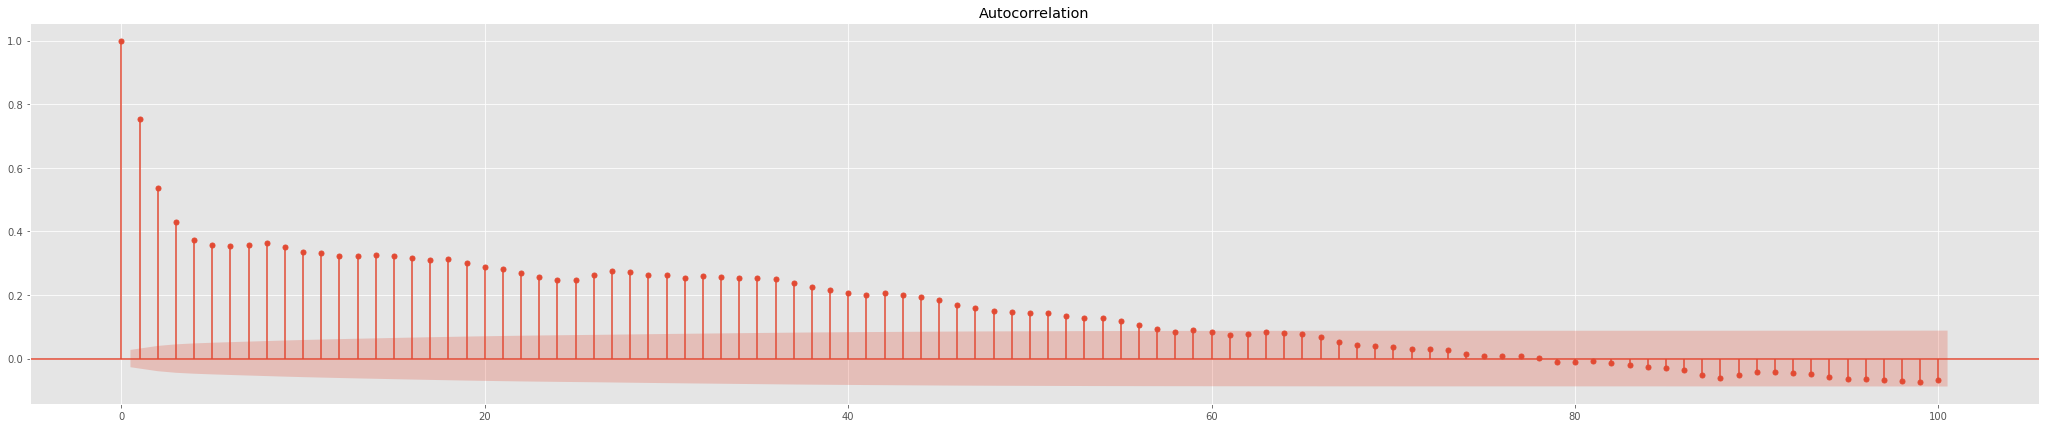

In [21]:
acf = plot_acf(daily_RJ['Wind Speed'],lags = 100)

                               SARIMAX Results                                
Dep. Variable:             Wind Speed   No. Observations:                 5205
Model:                ARIMA(0, 0, 30)   Log Likelihood               -6226.264
Date:                Sun, 25 Apr 2021   AIC                          12516.527
Time:                        12:35:24   BIC                          12726.363
Sample:                             0   HQIC                         12589.922
                               - 5205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0388      0.062     48.703      0.000       2.916       3.161
ma.L1          0.7836      0.013     61.649      0.000       0.759       0.809
ma.L2          0.4459      0.016     27.144      0.0

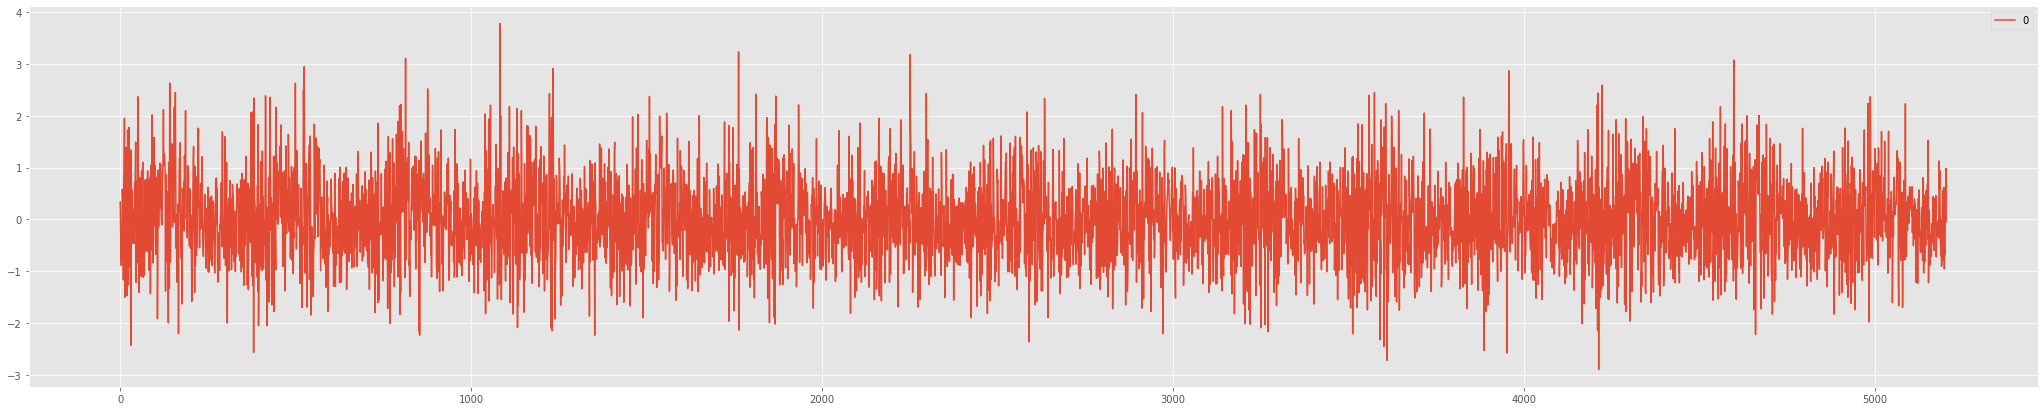

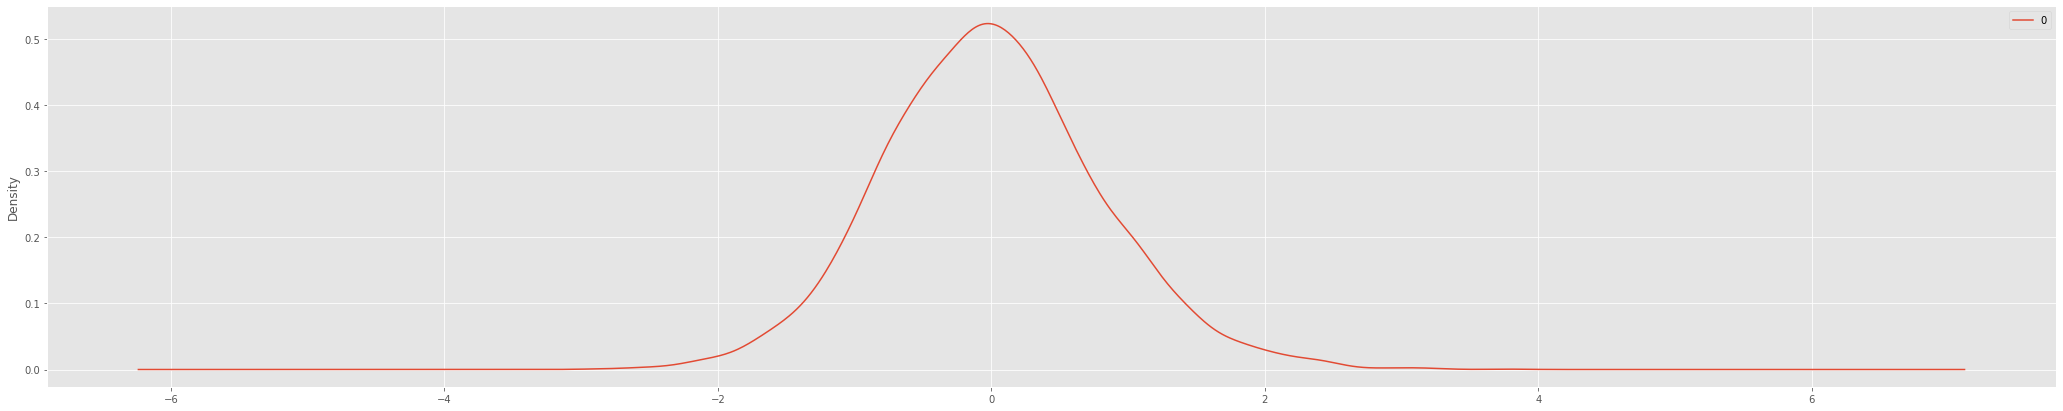

                 0
count  5205.000000
mean      0.000038
std       0.800354
min      -2.899346
25%      -0.532517
50%      -0.025972
75%       0.491893
max       3.778806


In [22]:

# from statsmodels.tsa.arima_model import ARIMA
modelMA = ARIMA(daily_RJ['Wind Speed'],order=(0,0,30))
fit_modelMA = modelMA.fit()
print(fit_modelMA.summary())
residualsMA = pd.DataFrame(fit_modelMA.resid)
residualsMA.plot()
plt.show()
residualsMA.plot(kind='kde')
plt.show()
print(residualsMA.describe())

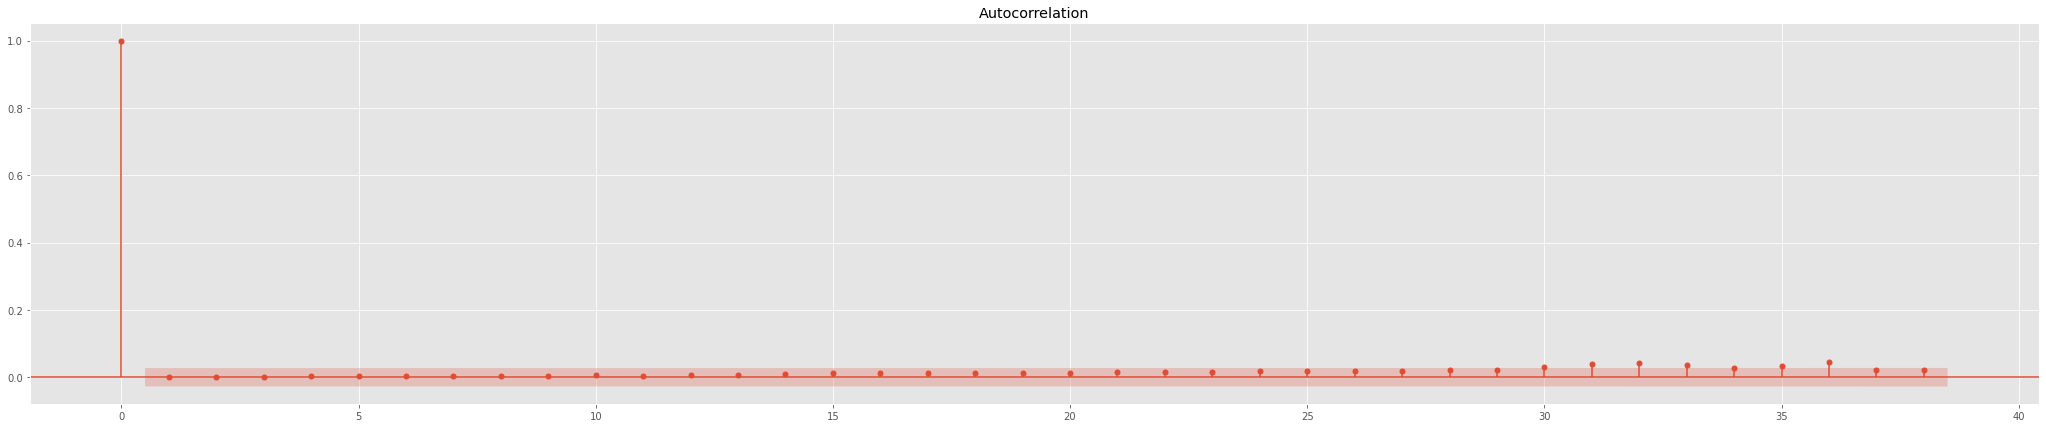

In [23]:
acf_plot = plot_acf(residualsMA)

In [24]:
percentage = []
for i in range(len(residuals)):
  if daily_RJ['Wind Speed'][i]==0:
    continue
  percentage.append((abs(residualsMA[0][i])/(daily_RJ['Wind Speed'][i]))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error: {0} %".format(mape))

Mean Absolute Percentage Error: 24.930575877015915 %


In [25]:

modelARMA = ARIMA(daily_RJ['Wind Speed'],order=(12,0,10))
fit_modelARMA = modelARMA.fit()
print(fit_modelARMA.summary())
residualsARMA = pd.DataFrame(fit_modelARMA.resid)

c:\users\91993\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\91993\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\91993\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:             Wind Speed   No. Observations:                 5205
Model:               ARIMA(12, 0, 10)   Log Likelihood               -6199.052
Date:                Sun, 25 Apr 2021   AIC                          12446.104
Time:                        12:35:59   BIC                          12603.481
Sample:                             0   HQIC                         12501.150
                               - 5205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0081      0.120     25.010      0.000       2.772       3.244
ar.L1          0.0467    102.011      0.000      1.000    -199.891     199.984
ar.L2         -0.0478     11.785     -0.004      0.9

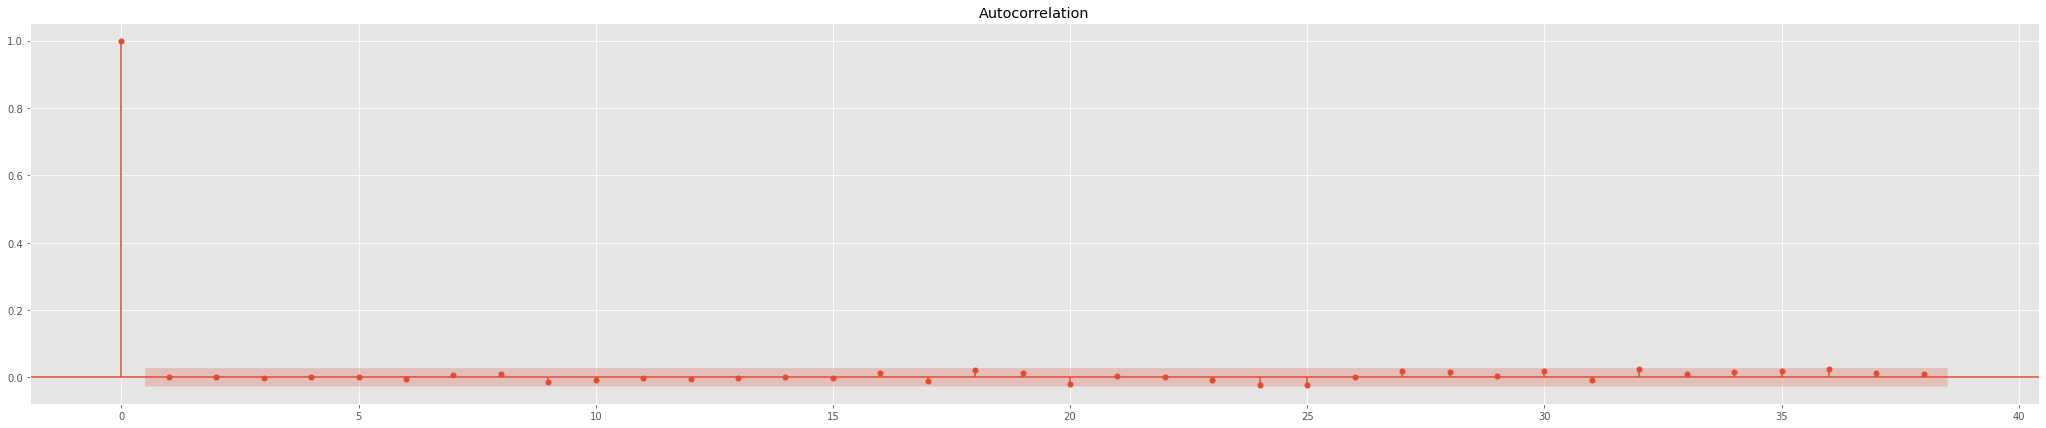

In [26]:
acf_plot = plot_acf(residualsARMA)
# Finding Forecast Error


In [27]:
percentage = []
for i in range(len(residualsARMA)):
  if daily_RJ['Wind Speed'][i]==0:
    continue
  percentage.append((abs(residualsARMA[0][i])/(daily_RJ['Wind Speed']))*100)
mape = sum(percentage)/len(percentage)
print("Mean Absolute Percentage Error:{0} %".format(mape))

Mean Absolute Percentage Error:0       18.429153
1       19.928885
2       25.132328
3       36.359060
4       34.932132
          ...    
5200    44.451873
5201    24.765531
5202    23.212992
5203    16.997699
5204    15.035657
Name: Wind Speed, Length: 5205, dtype: float64 %


In [33]:
daily_RJ

,date_time,Wind Speed
0,2000-01-01,3.374157
1,2000-01-02,3.120238
2,2000-01-03,2.474218
3,2000-01-04,1.710244
4,2000-01-05,1.780105
...,...,...
5200,2014-12-27,1.398881
5201,2014-12-28,2.510863
5202,2014-12-29,2.678796
5203,2014-12-30,3.658310
